In [26]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random
import os

In [11]:
model = Prophet() #instantiate Prophet


In [3]:
df= pd.read_csv('shampoo-sales1.csv')
df.head()

,Month,Sales
0,1/1/2017 0:00,266.0
1,2/1/2017 0:00,145.9
2,3/1/2017 0:00,183.1
3,4/1/2017 0:00,119.3
4,5/1/2017 0:00,180.3


In [12]:
df = df.rename(columns={'Sales': 'y', 'Month':'ds'})
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])
model = Prophet() #instantiate Prophet
model.fit(df)

18:46:31 - cmdstanpy - INFO - Chain [1] start processing
18:46:32 - cmdstanpy - INFO - Chain [1] done processing


In [14]:

''' {'year': 'A',
    'quarter': 'Q',
    'month': 'M',
    'day': 'D',
    'hour': 'H',
    'minute': 'T',
    'second': 'S',
    'millisecond': 'L',
    'microsecond': 'U',
    'nanosecond': 'N'}
'''
    
    
future_data = model.make_future_dataframe(periods=10, freq = 'M')
future_data
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)



,ds,yhat,yhat_lower,yhat_upper
36,2019-12-31,1.641286,1.608974,1.676304
37,2020-01-31,2.041112,2.008076,2.078766
38,2020-02-29,1.817627,1.782781,1.853933
39,2020-03-31,1.955034,1.921189,1.986916
40,2020-04-30,1.851831,1.821306,1.885084
41,2020-05-31,1.904000,1.872445,1.938908
42,2020-06-30,1.910682,1.877735,1.944361
43,2020-07-31,1.863882,1.831218,1.897368
44,2020-08-31,1.994360,1.959780,2.027926
45,2020-09-30,1.998252,1.963433,2.034622


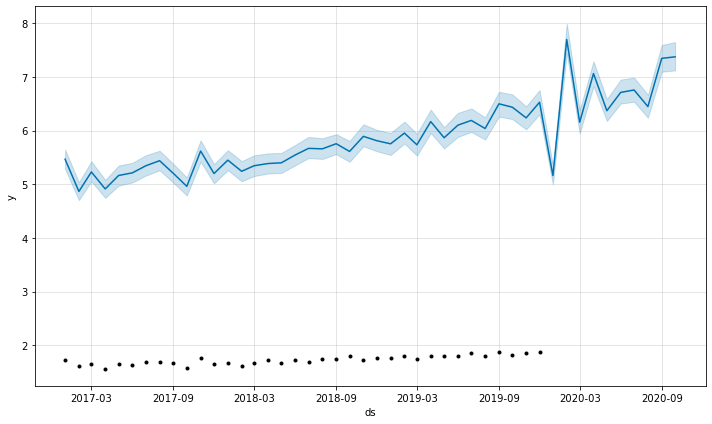

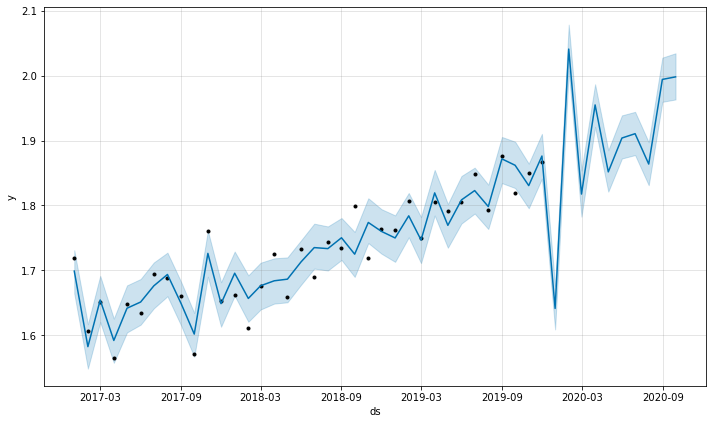

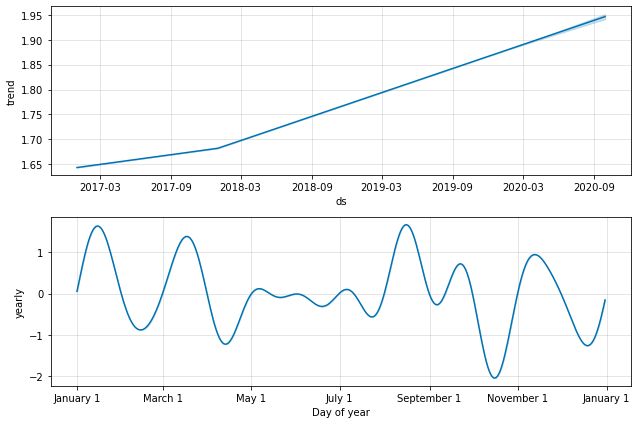

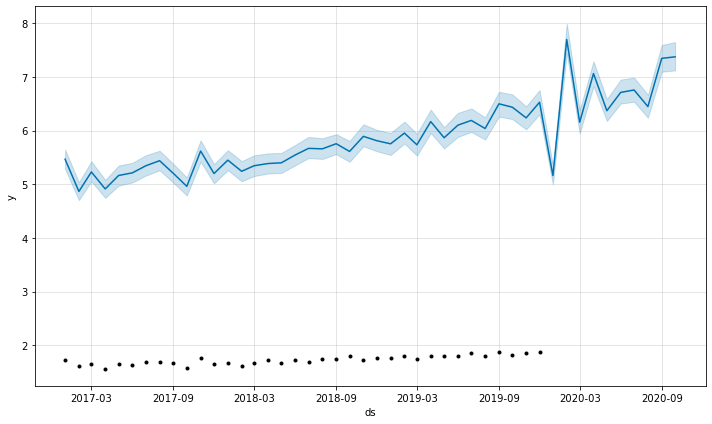

In [15]:
    model.plot(forecast_data) 
    model.plot_components(forecast_data)
    forecast_data_orig = forecast_data # make sure we save the original forecast data
    forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
    forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
    forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
    model.plot(forecast_data_orig)


In [19]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']
final_df = pd.DataFrame(forecast_data_orig)
final_df_1=final_df[['ds','yhat']].tail(10)
final_df_1 = final_df_1.rename(columns={'yhat': 'Sales', 'ds':'Month'})
rmse = mean_squared_error(df["y_orig"].iloc[24:], final_df['yhat'].iloc[24:36])**0.5
print('Test MSE: %.3f' % rmse)

Test MSE: 0.119


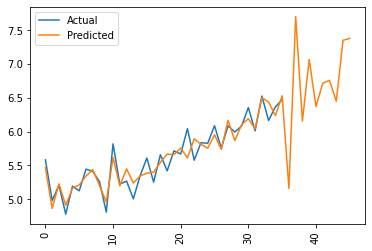

In [28]:
fig,ax=plt.subplots(nrows=1, ncols=1)
ax.plot(df["y_orig"],label="Actual")
ax.plot(final_df["yhat"],label="Predicted")
ax.legend()
plt.xticks(rotation=90)
plt.show()
# n=random.randint(0,1000000000000)
# n=str(n)
# fig.savefig(os.path.join(app.config["IMAGE_UPLOADS"],n+'time_series.png'))  
# full_filename= os.path.join(app.config["IMAGE_UPLOADS"],n+'time_series.png')   
            
#return 'nothing'
# return render_template('home.html',user_image = full_filename,tables=[final_df_1.to_html(classes='forecast')],titles=['na','forecast'],query1 = request.form['query1'],query2 = request.form['query2'],query3 = request.form['query3'])
    
